In [5]:
import pandas as pd
import numpy as np
path= r"C:\Users\DELL\Desktop\ml\Cellphone.xlsx"
df=pd.read_excel(path)
print(df.head())

   Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9  


In [6]:
df.isnull().sum()


Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [26]:
x=df.drop(columns='Price')
y=df['Price']
print(y)


0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 161, dtype: int64


In [8]:

df['weight']=df['weight'].astype('int64')
df['resoloution']=df['resoloution'].astype('int64')
df['cpu freq']=df['cpu freq'].astype('int64')
df['internal mem']=df['internal mem'].astype('int64')
df['ram']=df['ram'].astype('int64')
df['RearCam']=df['RearCam'].astype('int64')
df['Front_Cam']=df['Front_Cam'].astype('int64')
df['thickness']=df['thickness'].astype('int64')
print(df.dtypes)

Product_id      int64
Price           int64
Sale            int64
weight          int64
resoloution     int64
ppi             int64
cpu core        int64
cpu freq        int64
internal mem    int64
ram             int64
RearCam         int64
Front_Cam       int64
battery         int64
thickness       int64
dtype: object


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Product_id    161 non-null    int64
 1   Price         161 non-null    int64
 2   Sale          161 non-null    int64
 3   weight        161 non-null    int64
 4   resoloution   161 non-null    int64
 5   ppi           161 non-null    int64
 6   cpu core      161 non-null    int64
 7   cpu freq      161 non-null    int64
 8   internal mem  161 non-null    int64
 9   ram           161 non-null    int64
 10  RearCam       161 non-null    int64
 11  Front_Cam     161 non-null    int64
 12  battery       161 non-null    int64
 13  thickness     161 non-null    int64
dtypes: int64(14)
memory usage: 17.7 KB


In [10]:
print(df.shape)

(161, 14)


In [11]:
corr = df.corr()
corr.shape

(14, 14)

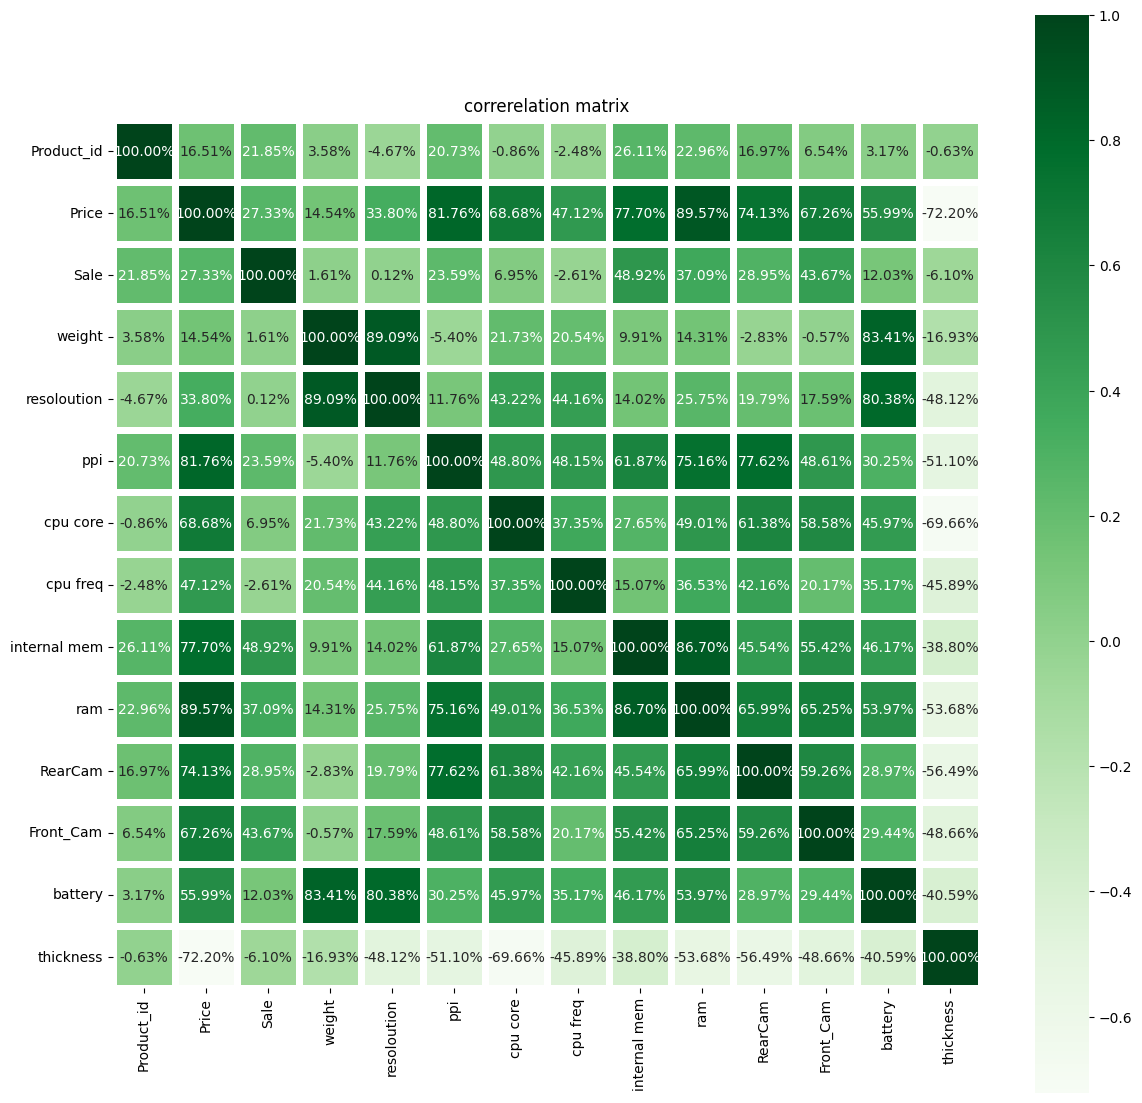

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,square=True,cmap='Greens',fmt='.2%',linewidths=5)
plt.title('correrelation matrix')
plt.show()

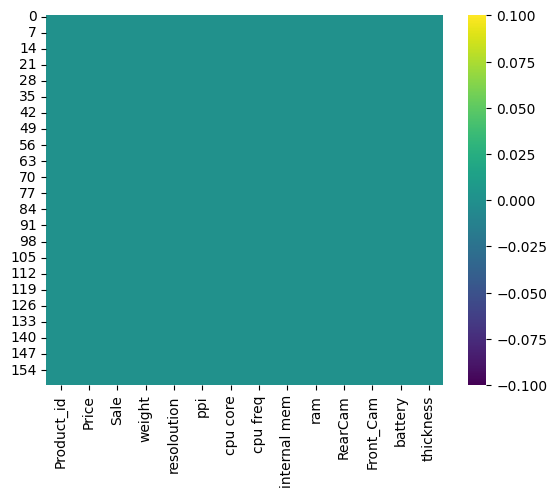

In [14]:
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

<Axes: xlabel='ram', ylabel='count'>

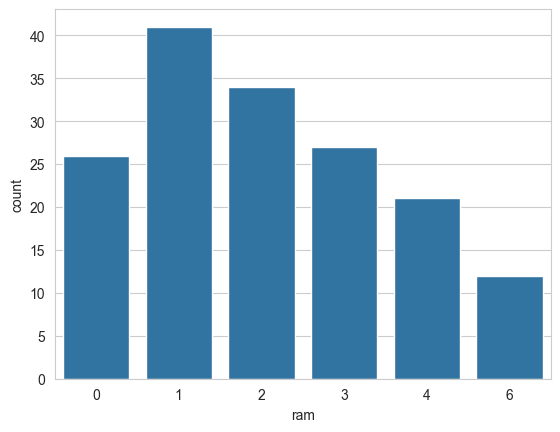

In [18]:

sns.countplot(x='ram',data=df)

<Figure size 1000x1000 with 0 Axes>

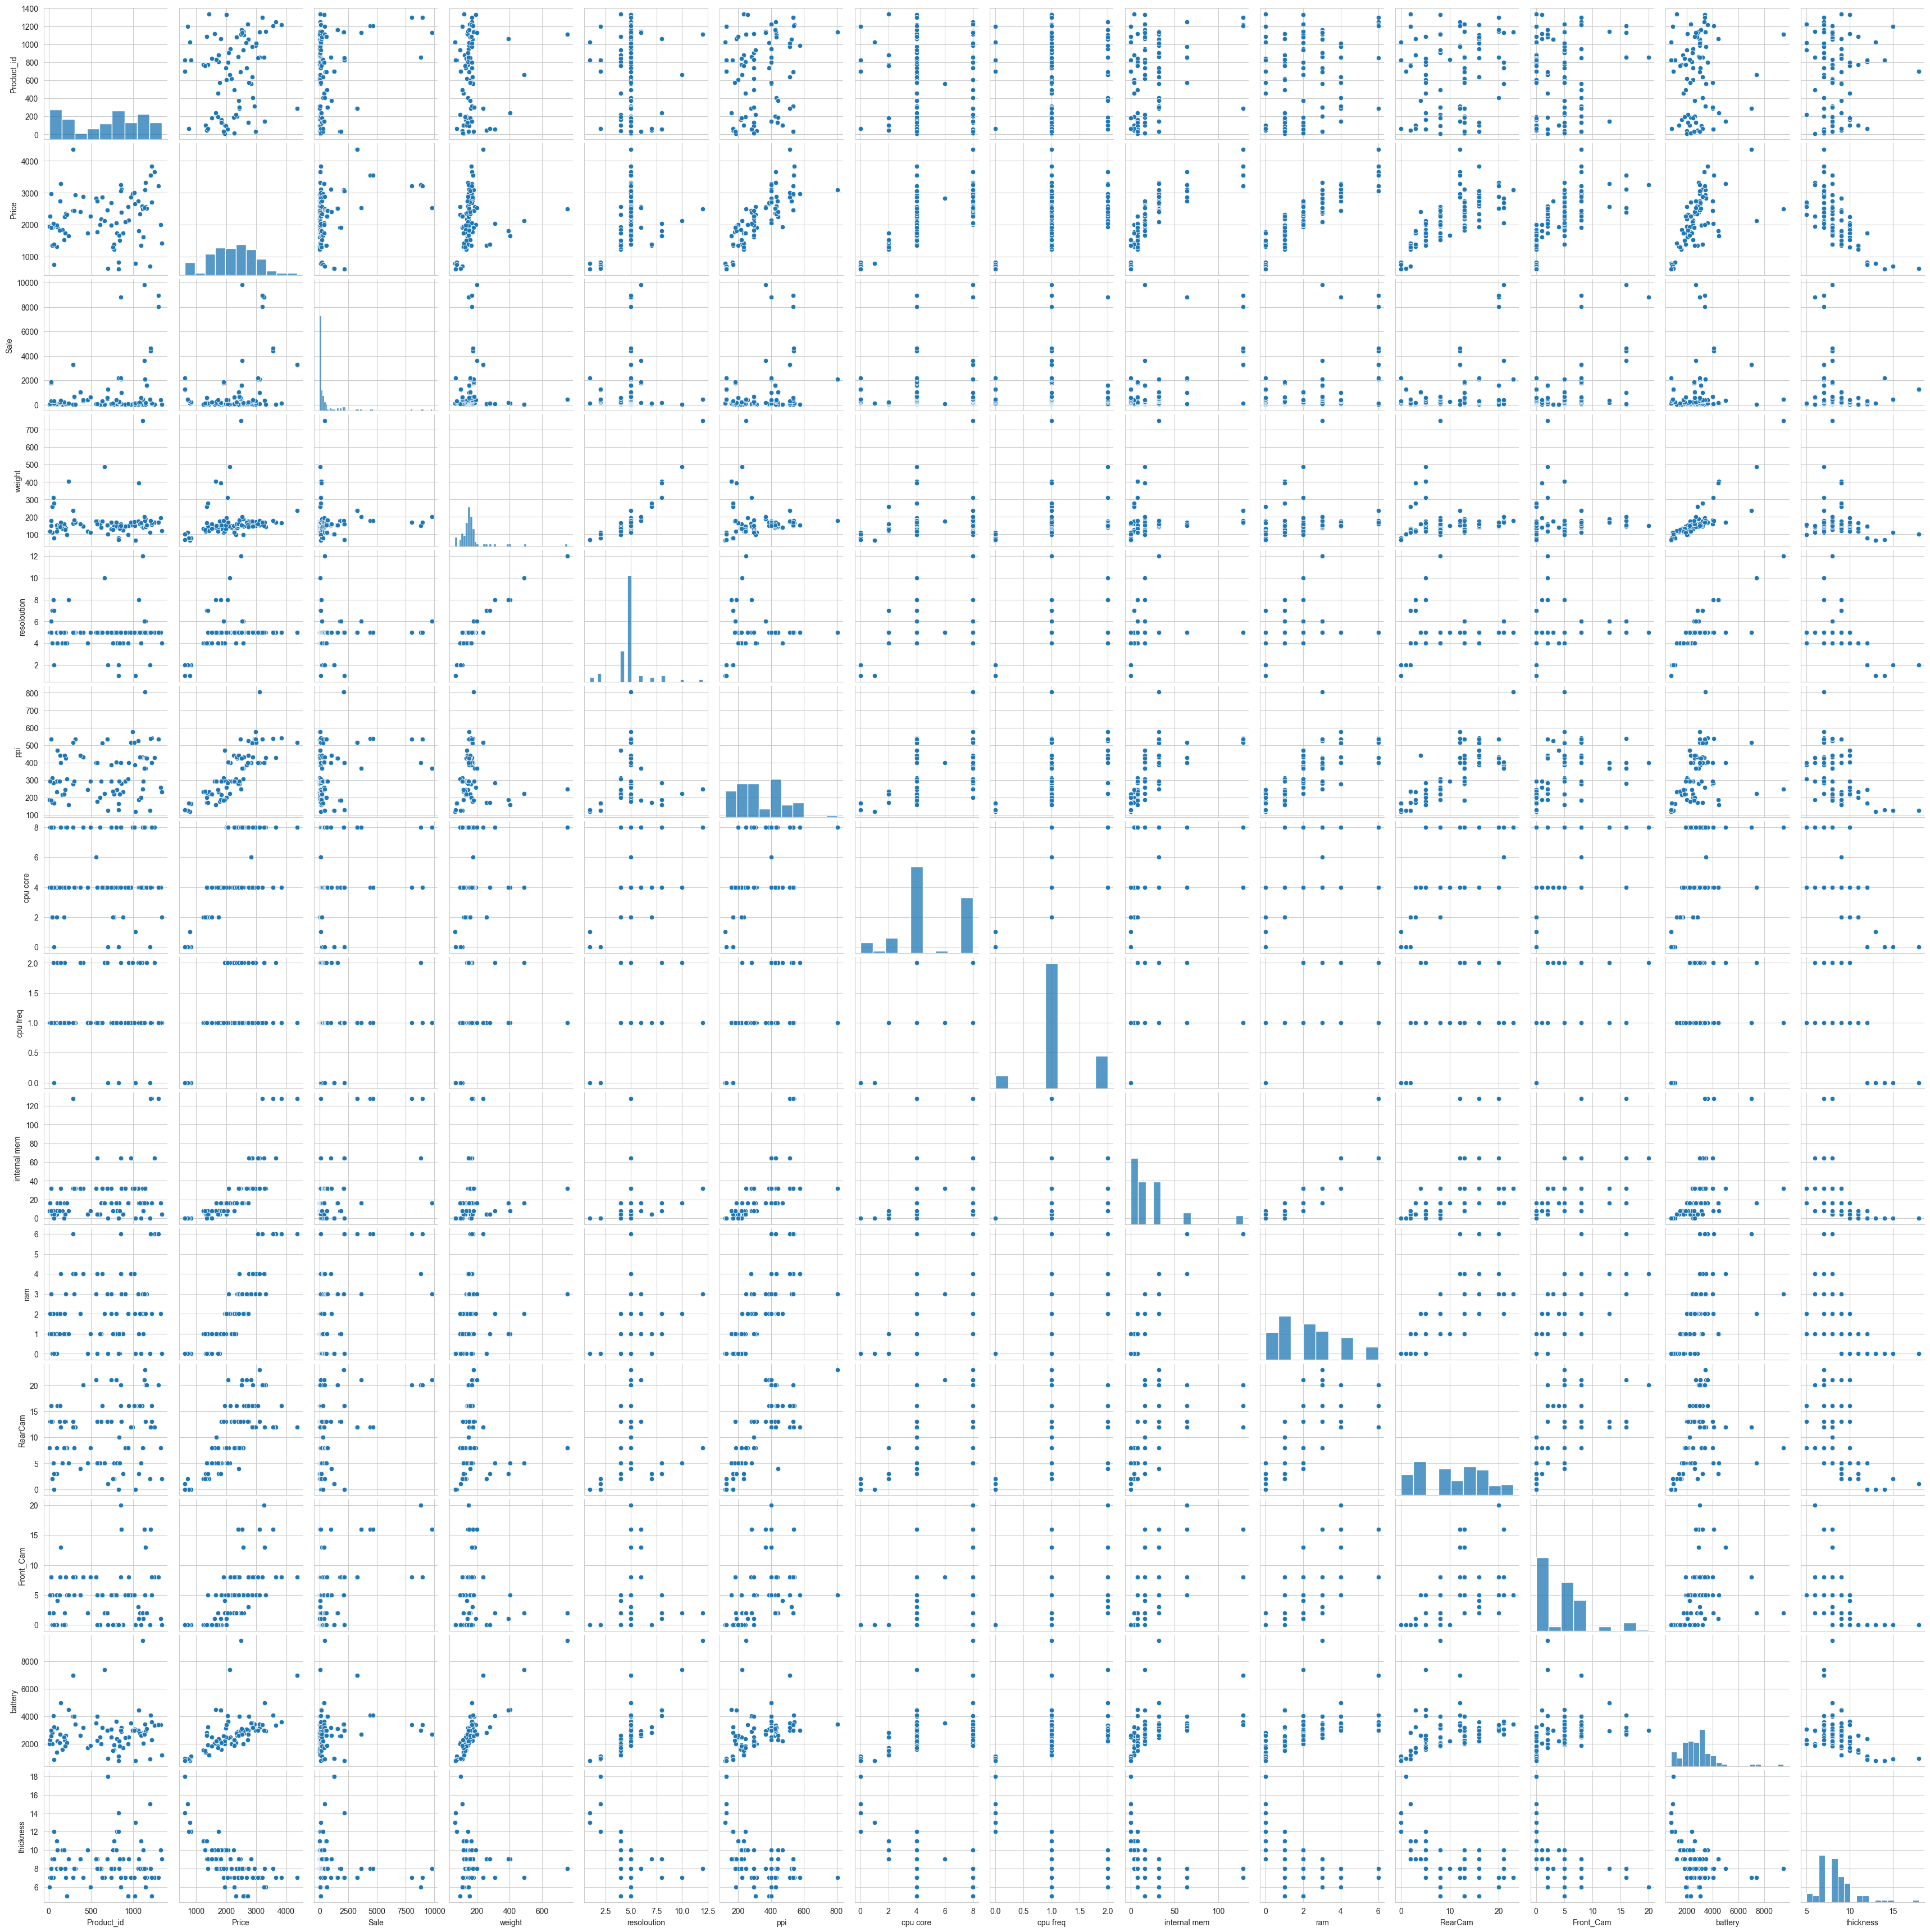

In [21]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

In [27]:
from sklearn.feature_selection import SelectKBest,f_regression
selector=SelectKBest(score_func=f_regression,k='all')
selector.fit(x,y)
scores=pd.DataFrame({'features':x.columns,'scores':selector.scores_})
print(scores)



        features      scores
0     Product_id    4.457458
1           Sale   12.831037
2         weight    3.432643
3    resoloution   20.507352
4            ppi  320.628446
5       cpu core  141.970409
6       cpu freq   45.366287
7   internal mem  242.191973
8            ram  645.061140
9        RearCam  193.981846
10     Front_Cam  131.334377
11       battery   72.622832
12     thickness  173.164625


In [37]:
from sklearn.model_selection import train_test_split
x_selected=x[scores['features']]
x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(df.shape)

(128, 13)
(161, 14)


In [39]:
print(df.describe())

        Product_id        Price         Sale      weight  resoloution  \
count   161.000000   161.000000   161.000000  161.000000   161.000000   
mean    675.559006  2215.596273   621.465839  170.341615     4.919255   
std     410.851583   768.187171  1546.618517   92.934191     1.557141   
min      10.000000   614.000000    10.000000   66.000000     1.000000   
25%     237.000000  1734.000000    37.000000  134.000000     4.000000   
50%     774.000000  2258.000000   106.000000  153.000000     5.000000   
75%    1026.000000  2744.000000   382.000000  170.000000     5.000000   
max    1339.000000  4361.000000  9807.000000  753.000000    12.000000   

              ppi    cpu core    cpu freq  internal mem         ram  \
count  161.000000  161.000000  161.000000    161.000000  161.000000   
mean   335.055901    4.857143    1.118012     24.496894    2.149068   
std    134.826659    2.444016    0.504714     28.808880    1.666625   
min    121.000000    0.000000    0.000000      0.000000   

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
v=VotingRegressor(estimators=[
    ('svr',SVR()),
    ('rf',RandomForestRegressor(random_state=42))
])
v.fit(x_train,y_train)
v_pred=v.predict(x_test)
r=r2_score(y_test,v_pred)
print(r*100)

68.56248247846456


In [68]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_test,pred)
m=mean_squared_error(y_test,pred)

print(r2*100)

95.46387621244179


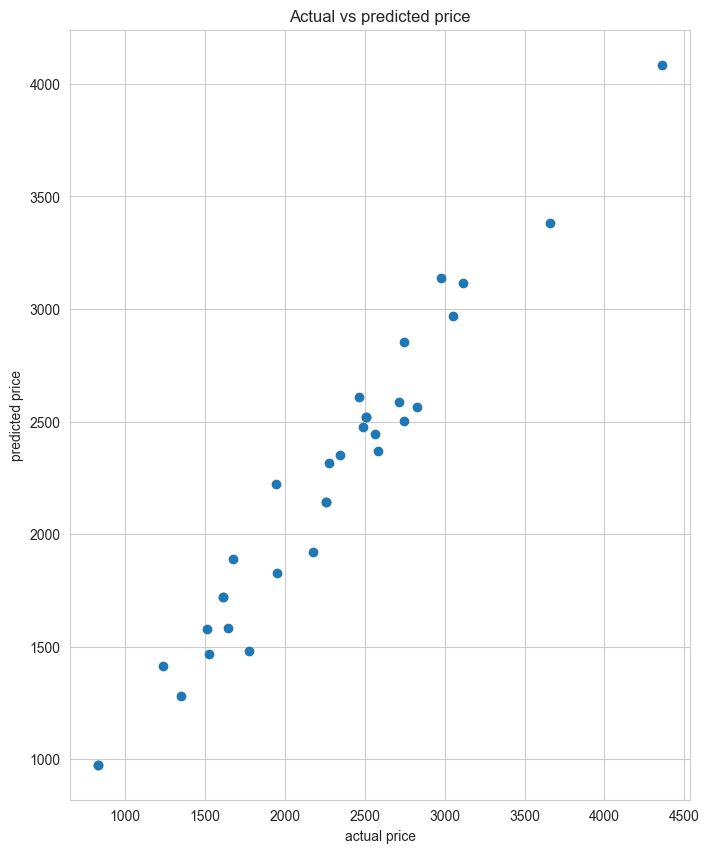

In [72]:
plt.figure(figsize=(8,10))
plt.scatter(y_test,pred,alpha=1)
plt.title('Actual vs predicted price')
plt.xlabel('actual price')
plt.ylabel("predicted price")
plt.show()